For inferencing ACGPN and SieveNet! 

ACGPN repo: https://github.com/switchablenorms/DeepFashion_Try_On

SieveNet repo: https://github.com/levindabhi/SieveNet

This notebook is hard coded for inferencing one image at a time.

Notebook by [Levin Dabhi](https://levindabhi.github.io/)

# ACGPN

In [2]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 161 (delta 20), reused 18 (delta 18), pack-reused 139
Receiving objects: 100% (161/161), 302.85 KiB | 6.88 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/home/dagong/acgpn/ACGPN/ACGPN/ACGPN
/home/dagong/acgpn/ACGPN/ACGPN


In [4]:
!pip install ninja

In [1]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [6]:
'''
gdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)
%cd Data_preprocessing
!unzip data
%cd ..
'''

"\ngdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)\n%cd Data_preprocessing\n!unzip data\n%cd ..\n"

In [7]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [8]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/home/dagong/acgpn/ACGPN/pose
/home/dagong/tensor_cuda/.cuda_venv/lib/python3.10/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko 

/home/dagong/acgpn/ACGPN


In [9]:
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (203/203), done./203)
remote: Compressing objects: 100% (109/109), done.
remote: Total 769 (delta 103), reused 94 (delta 94), pack-reused 566
Receiving objects: 100% (769/769), 3.89 MiB | 2.69 MiB/s, done.
Resolving deltas: 100% (184/184), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Counting objects: 100% (334/334), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 822 (delta 312), reused 299 (delta 299), pack-reused 488
Receiving objects: 100% (822/822), 30.71 MiB | 2.35 MiB/s, done.
Resolving deltas: 100% (391/391), done.


In [13]:
#for segmentation mask generation
#url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
#output = 'lip_final.pth'
#gdown.download(url, output, quiet=False)
%cd ..

/home/dagong/acgpn/ACGPN


In [14]:
# !mkdir saved_models
# !mkdir saved_models/u2net
# !mkdir saved_models/u2netp
#!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
#!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
from U_2_Net import u2net_load
from U_2_Net import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')


...load U2NEP---4.7 MB


In [18]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

mkdir: cannot create directory ‘checkpoints’: File exists
Access denied with the following error:
/home/dagong/acgpn/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  


 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx 




  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/home/dagong/acgpn/ACGPN


### Please upload your cloth image below

In [19]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/home/dagong/acgpn/ACGPN/inputs/cloth


ModuleNotFoundError: No module named 'google.colab'

### Please upload your person image below

In [20]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

[Errno 2] No such file or directory: 'inputs/img'
/home/dagong/acgpn/ACGPN/inputs/cloth


ModuleNotFoundError: No module named 'google.colab'

In [15]:
sorted(os.listdir('inputs/cloth'))
import time


Generating mask for: img001.png
Saving output at Data_preprocessing/test_edge/img001.png


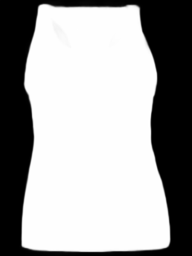

In [30]:
cloth_name = 'img001.png'

cloth_path = os.path.join(
    'inputs/cloth', sorted(os.listdir('inputs/cloth'))[-1])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))
u2net_run.infer(u2net, 'Data_preprocessing/test_color',
                'Data_preprocessing/test_edge')

Image.open(f'Data_preprocessing/test_edge/{cloth_name}')

In [31]:
os.listdir('inputs/img')

['000066_0.jpg']

In [43]:
img_name = 'img001.png'

img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[-1])
img = Image.open(img_path)
img = img.resize((192, 256), Image.BICUBIC)
print(type(img))
img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
os.system("python Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'")

pose_path = os.path.join('Data_preprocessing/test_pose',
                        img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)

<class 'PIL.Image.Image'>


/home/dagong/tensor_cuda/.cuda_venv/lib/python3.10/site-packages/torch/utils/cpp_extension.py:1962: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
  0%|          | 0/1 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/home/dagong/acgpn/ACGPN/Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py", line 175, in <module>
    main()
  File "/home/dagong/acgpn/ACGPN/Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py", line 151, in main
    output = model(image.cuda())
  File "/home/dagong/tensor_cuda/.cuda_venv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1529, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/home/dagong/tensor_cuda/.cuda_venv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1538, in _call_impl
    return forward_call(*args, **kwargs)
  File "/home

File saved at Data_preprocessing/test_pose/img001_keypoints.json


In [44]:
os.system('rm -rf Data_preprocessing/test_pairs.txt')
with open('Data_preprocessing/test_pairs.txt', 'w') as f:
    f.write(f'{img_name} {cloth_name}')

In [45]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

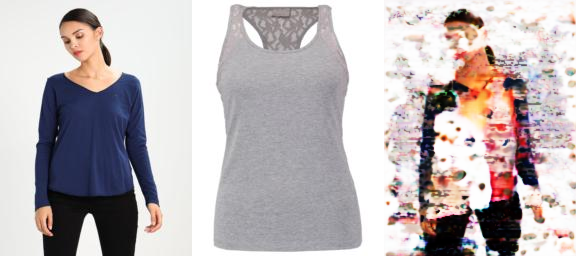

In [47]:
output_grid = np.concatenate([
    np.array(Image.open(f'Data_preprocessing/test_img/{img_name}')),
    np.array(Image.open(f'Data_preprocessing/test_color/{cloth_name}')),
    np.array(Image.open(f'results/test/try-on/{img_name}'))
], axis=1)

image_grid = Image.fromarray(output_grid)

image_grid

### Check results in 'results' folder!

**Deleting all images**

In [ ]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*

In [ ]:
!rm -rf results/*

In [ ]:
%cd /content/

/content


# SieveNet

In [ ]:
!git clone https://github.com/levindabhi/SieveNet.git
%cd SieveNet

Cloning into 'SieveNet'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 96 (delta 34), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (96/96), done.
/content/SieveNet


In [ ]:
!mkdir checkpoints
%cd checkpoints

!mkdir GMM
%cd GMM
!gdown --id 1zuL44-GpiXJqADjuKZWrKJzD1UNiwn5r
%cd ..

!mkdir SEG
%cd SEG
!gdown --id 1VtQHs2ynCZYFYre7JsF-TCObUv4X0dON
%cd ..

!mkdir TOM
%cd TOM
!gdown --id 1Er5bnFXu6zbSbRhniywcIZdbY2ceCMIp
%cd ..

%cd ..

/content/SieveNet/checkpoints
/content/SieveNet/checkpoints/GMM
Downloading...
From: https://drive.google.com/uc?id=1zuL44-GpiXJqADjuKZWrKJzD1UNiwn5r
To: /content/SieveNet/checkpoints/GMM/gmm_final.pth
123MB [00:01, 69.3MB/s]
/content/SieveNet/checkpoints
/content/SieveNet/checkpoints/SEG
Downloading...
From: https://drive.google.com/uc?id=1VtQHs2ynCZYFYre7JsF-TCObUv4X0dON
To: /content/SieveNet/checkpoints/SEG/segm_final.pth
117MB [00:01, 59.6MB/s]
/content/SieveNet/checkpoints
/content/SieveNet/checkpoints/TOM
Downloading...
From: https://drive.google.com/uc?id=1Er5bnFXu6zbSbRhniywcIZdbY2ceCMIp
To: /content/SieveNet/checkpoints/TOM/tom_final.pth
117MB [00:02, 43.1MB/s]
/content/SieveNet/checkpoints
/content/SieveNet


In [ ]:
%cd pose/
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/SieveNet/pose
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/SieveNet/pose/pose_iter_440000.caffemodel
209MB [00:04, 48.9MB/s]
/content/SieveNet


In [ ]:
%%writefile config.py
import os.path as osp
import os


class parser:
    def __init__(self):
        self.dataroot = 'dataset'
        self.datamode = 'test'                                   #train, test
        self.stage = 'TOM'                                        #GMM, SEG, TOM
        self.runmode = self.datamode                              
        self.name = self.stage   
        if self.datamode == 'train':
            self.data_list = 'train_pairs.txt'
        elif self.datamode == 'test':
            self.data_list = 'test_pairs.txt'
        self.fine_width = 192
        self.fine_height = 256
        self.radius = 4
        self.grid_path =  osp.join(self.dataroot, 'grid.png')
        if self.datamode == 'train':                            #for training keep true, for test keep false
            self.shuffle = True             
        else:
            self.shuffle = False
        self.batch_size = 16
        self.workers = 1
        self.grid_size = 5
        
        self.lr = 0.002
        self.keep_step = 8000
        self.decay_step = 5500
        self.previous_step = 0                                  #if you want to resume training from some steps    
                                                                #set previous_step in as per last updated checkpoints 
        self.save_count = 200
        self.display_count = 50
        
        self.tensorboard_dir = osp.join(os.getcwd(), 'tensorboard')
        self.checkpoint_dir = osp.join(os.getcwd(), 'checkpoints')
        self.save_dir = osp.join(os.getcwd(), 'outputs')         #for saving output while infernce
        if not osp.exists(self.save_dir):
            os.makedirs(self.save_dir)
        if self.previous_step == 0:
            self.checkpoint = ''
        else:
            self.checkpoint = osp.join(self.checkpoint_dir, self.name, 'step_%06d.pth' % (self.previous_step))

        #Set your images path here
        self.input_image_path = 'custom/input/019579_0.jpg'
        self.input_image_path = '/content/SieveNet/000006_0.jpg'
        self.cloth_image_path = 'custom/input/017575_1.jpg'
        self.cloth_image_path = '/content/SieveNet/000530_1.jpg'
        
        self.human_parsing_image_path = '/content/SieveNet/000006_0.png'

In [ ]:
!python inference.py

OpenCV(ocl4dnn): consider to specify kernel configuration cache directory 
                 via OPENCV_OCL4DNN_CONFIG_PATH parameter.
OpenCL program build log: dnn/dummy
Status -11: CL_BUILD_PROGRAM_FAILURE
-cl-no-subgroup-ifp
Error in processing command line: Don't understand command line argument "-cl-no-subgroup-ifp"!
File saved at /content/SieveNet/000006_0_keypoints.json
initialization method [normal]
initialization method [normal]
initialization method [normal]
----checkpoints loaded from path: /content/SieveNet/checkpoints/GMM/gmm_final.pth----
----checkpoints loaded from path: /content/SieveNet/checkpoints/SEG/segm_final.pth----
----checkpoints loaded from path: /content/SieveNet/checkpoints/TOM/tom_final.pth----
Output generated!
Output saved at /content/SieveNet/outputs
